## Download data from kaggle

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cum65705","key":"66ba2544006a3d7d2f2e681e347b346c"}'}

In [3]:
!ls -al
!mkdir -p ~/.kaggle
!ls -al ~/

total 20
drwxr-xr-x 1 root root 4096 Dec 14 09:13 .
drwxr-xr-x 1 root root 4096 Dec 14 09:12 ..
drwxr-xr-x 4 root root 4096 Dec 12 14:34 .config
-rw-r--r-- 1 root root   64 Dec 14 09:13 kaggle.json
drwxr-xr-x 1 root root 4096 Dec 12 14:35 sample_data
total 64
drwx------ 1 root root 4096 Dec 14 09:13 .
drwxr-xr-x 1 root root 4096 Dec 14 09:12 ..
-r-xr-xr-x 1 root root 1169 Jan  1  2000 .bashrc
drwxr-xr-x 1 root root 4096 Dec 12 14:49 .cache
drwx------ 4 root root 4096 Dec 12 14:49 .config
drwxr-xr-x 5 root root 4096 Dec 12 14:48 .ipython
drwx------ 2 root root 4096 Dec 12 14:48 .jupyter
drwxr-xr-x 2 root root 4096 Dec 14 09:13 .kaggle
drwxr-xr-x 2 root root 4096 Dec 12 14:46 .keras
drwxr-xr-x 1 root root 4096 Dec 12 14:48 .local
drwxr-xr-x 4 root root 4096 Dec 12 14:48 .npm
-rw-r--r-- 1 root root  148 Aug 17  2015 .profile
-r-xr-xr-x 1 root root  254 Jan  1  2000 .tmux.conf
-rw-r--r-- 1 root root  165 Dec 12 14:48 .wget-hsts


In [4]:
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!ls -al ~/.kaggle/

total 16
drwxr-xr-x 2 root root 4096 Dec 14 09:13 .
drwx------ 1 root root 4096 Dec 14 09:13 ..
-rw------- 1 root root   64 Dec 14 09:13 kaggle.json


In [5]:
!kaggle datasets download -d binovi/wholesale-customers-data-set

  0% 0.00/6.85k [00:00<?, ?B/s]
100% 6.85k/6.85k [00:00<00:00, 5.77MB/s]


In [6]:
!unzip wholesale-customers-data-set.zip

Archive:  wholesale-customers-data-set.zip
  inflating: Wholesale customers data.csv  


## Load library

In [7]:
# import the model from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import dendrogram, linkage, ward,  fcluster
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA


# import other required libs
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler


# viz libs
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

In [8]:
df = pd.read_csv('./Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [9]:
df.shape

(440, 8)

In [10]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [12]:
num_col = ["Fresh",	"Milk"	,"Grocery", "Frozen", "Detergents_Paper",	"Delicassen"]
cate_col = ["Channel", "Region"]

**catterplot showing the relation between MILK and GROCERY spending**

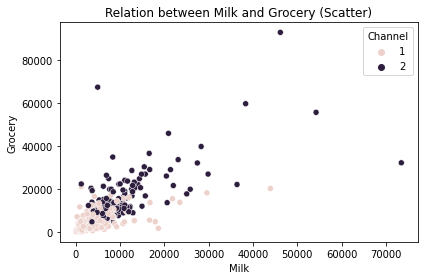

In [13]:
title = "Relation between Milk and Grocery (Scatter)"
sns.scatterplot(data=df,x='Milk',y='Grocery',hue='Channel')
plt.title(title)
plt.tight_layout() #show plot with tight layout
plt.show()
#plt.savefig("/content/EDA/"+title, dpi=300)

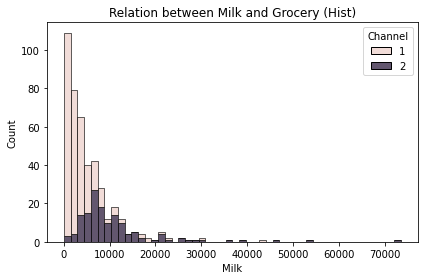

In [14]:
title = "Relation between Milk and Grocery (Hist)"
sns.histplot(df,x='Milk',hue='Channel',multiple="stack")
plt.title(title)
plt.tight_layout() #show plot with tight layout
plt.show()
#plt.savefig("/content/EDA/"+title, dpi=300)

**annotated clustermap of the correlations between spending on different categories**

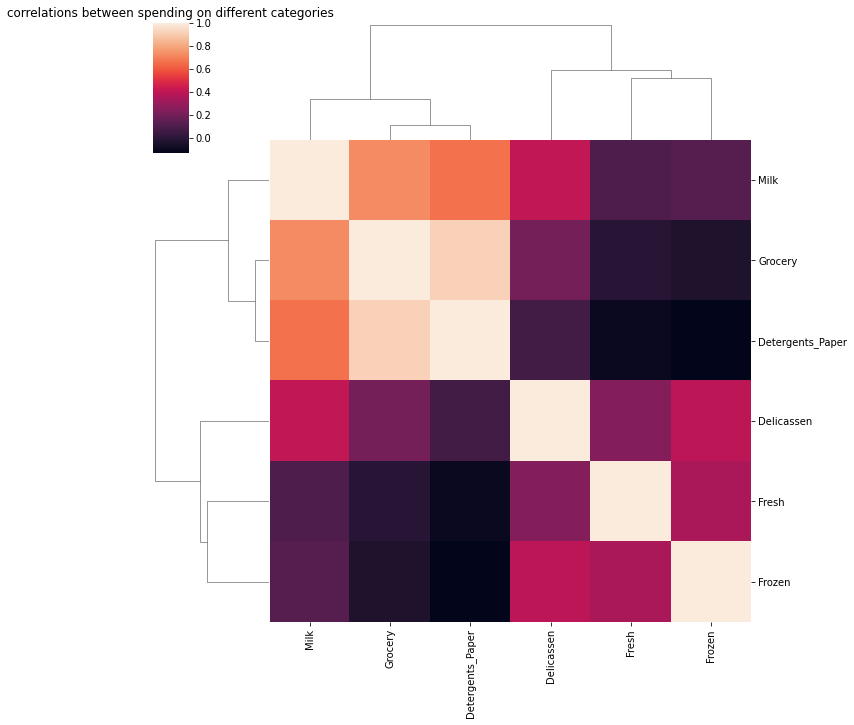

In [15]:
title = 'correlations between spending on different categories'
sns.clustermap(df[num_col].corr(),annot=False)
plt.title(title)
plt.show()
#plt.savefig("/content/EDA/"+title, dpi=300)

In [16]:
def getValueCount(feature):
  return(df[feature].value_counts())

In [17]:
for feature in cate_col:
  res = getValueCount(feature)
  print(feature+"'s value count\n")
  print(res)

Channel's value count

1    298
2    142
Name: Channel, dtype: int64
Region's value count

3    316
1     77
2     47
Name: Region, dtype: int64


**Visualize numerical Feature Relation**

* feature pair with highest correlation : `Detergents_Paper` & `Grocery` <br>
: intuitively makes sense for going "grocery shopping." 
* many points are around 0 : `Delicatessen`
* right-skewed hovering at the origin or near it and long tails : `overall numerical feature`

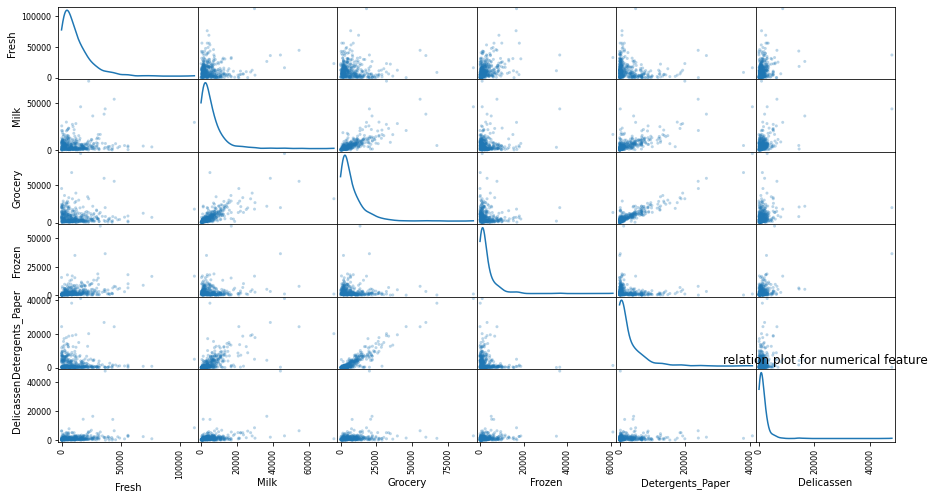

In [18]:
title = "relation plot for numerical feature"
pd.plotting.scatter_matrix(df[num_col], alpha=0.3,figsize=(15,8),diagonal='kde' )
plt.title(title)
plt.show()
#plt.savefig("/content/EDA/"+title, dpi=300)

**distribution for numeric feature**

* very skewed and "rich" in outliers what can negatively affect

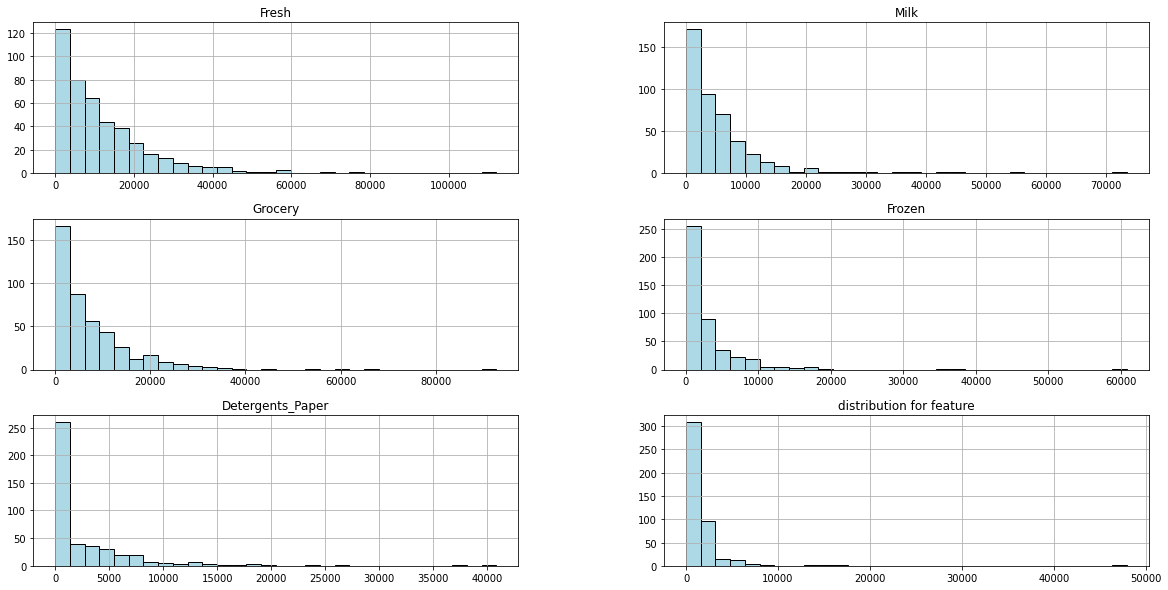

In [19]:
title = "distribution for feature"
df[num_col].hist(figsize=(20,10),bins=30, color='lightblue', edgecolor='black')
plt.title(title)
plt.show()
#plt.savefig("/content/EDA/"+title, dpi=300)

## data preprocessing

In [20]:
df_log= df.copy()
df_log_std = df.copy()
df_cate = df.copy()

### log

In [21]:
# Scale the data using the natural logarithm
df_log[num_col] = np.log(df_log[num_col])

In [22]:
df_log.drop(cate_col, axis=1, inplace=True)

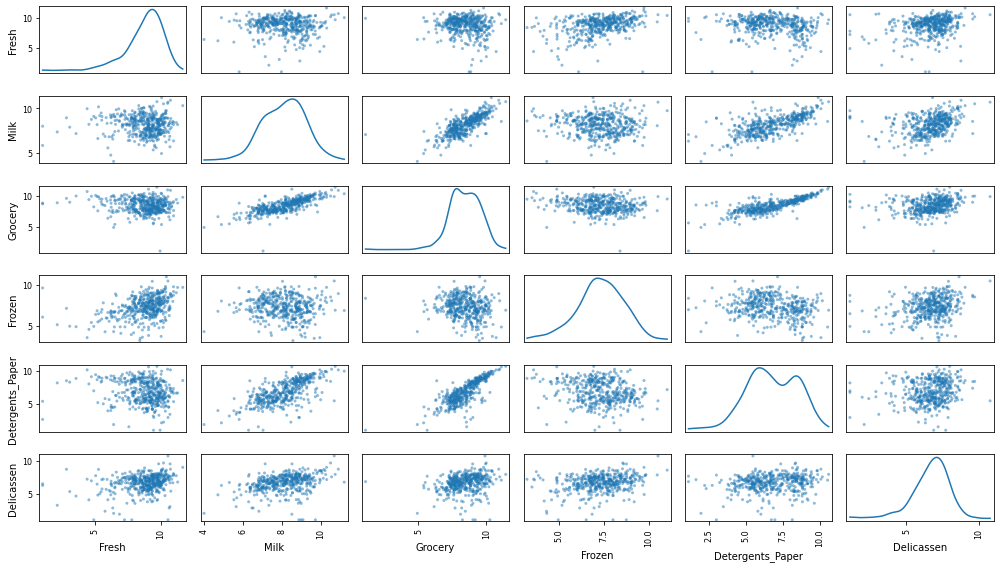

In [23]:
title = "relationtion Scale numerical feature using the natural logarithm"

pd.plotting.scatter_matrix(df_log[num_col], alpha=0.5, figsize=(14,8),diagonal='kde')
plt.tight_layout()

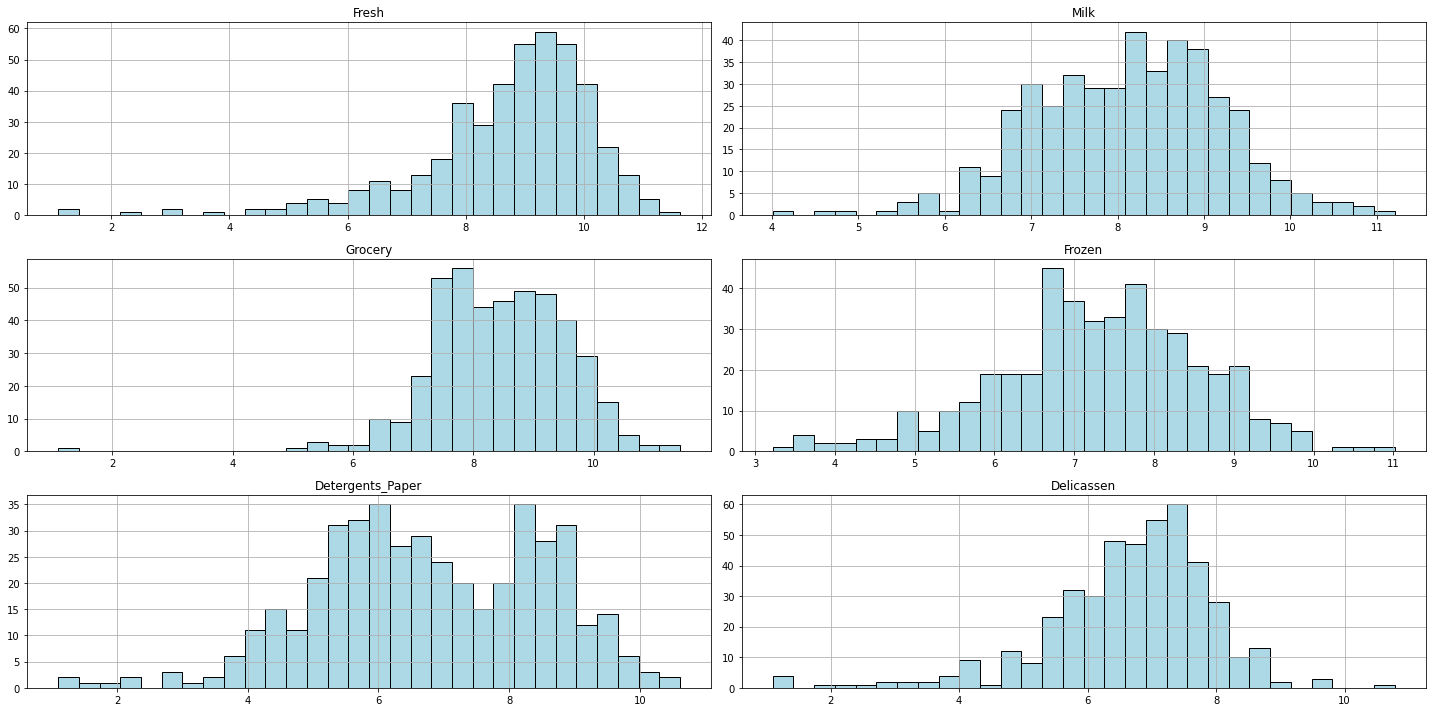

In [24]:
title = "distribution for Scale numerical feature using the natural logarithm"

df_log[num_col].hist(figsize=(20,10),bins=30, color='lightblue', edgecolor='black')
plt.tight_layout()

### StandardScaler

*  scale the data to same unit or "distance dimension"

In [25]:

scaler=MinMaxScaler()
columns=df_log[num_col]
norm=scaler.fit_transform(df_log[num_col]) #Only numeric variables
df_log_std[num_col]= norm

In [26]:
df_log_std.drop(cate_col, axis=1, inplace=True)

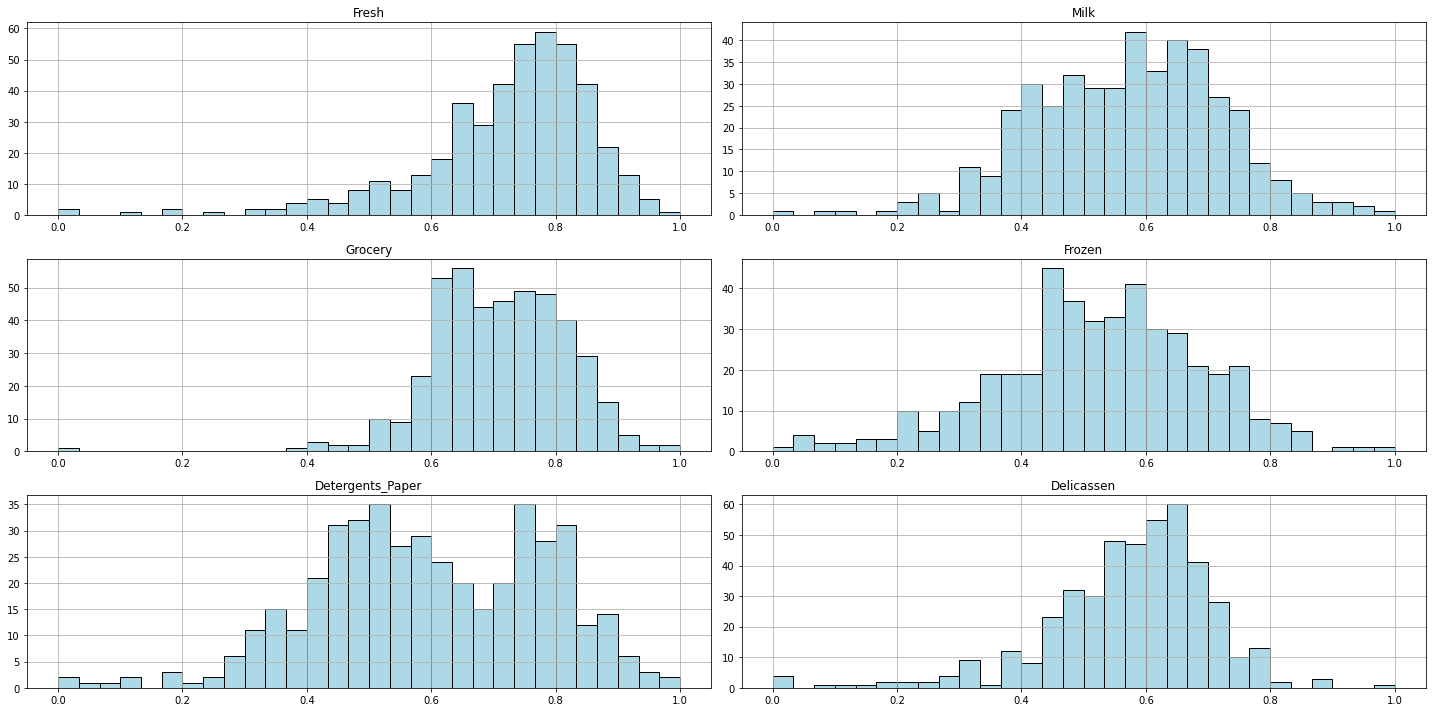

In [27]:
df_log_std[num_col].hist(figsize=(20,10),bins=30, color='lightblue', edgecolor='black')
plt.tight_layout()

In [28]:
df_log_std[num_col].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.724849,0.571533,0.710155,0.523561,0.597507,0.575104
std,0.140571,0.150238,0.107954,0.164735,0.180808,0.135428
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.660030,0.462322,0.636016,0.434852,0.467458,0.507613
50%,0.755027,0.581969,0.712659,0.527279,0.589002,0.596543
75%,0.820445,0.677044,0.790690,0.635711,0.753873,0.662053
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### remove outlier
* individual outliers may have a lot of weight in determing cluste
* move outliers to 1.5 of Interquartile range from 1st or 3rd quartile

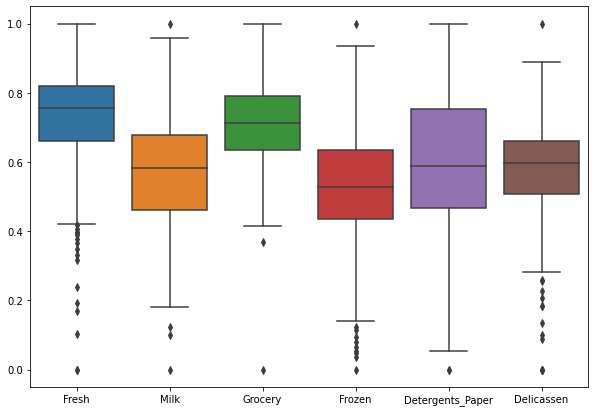

In [29]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df_log_std[num_col])
plt.show()

In [30]:
for i in num_col:
    iqr=np.percentile(df_log_std[i], 75)-np.percentile(df_log_std[i], 25)
    per75=np.percentile(df_log_std[i], 75)
    per25=np.percentile(df_log_std[i], 25)
    df_log_std[i]=np.where(df_log_std[i]>per75+1.5*iqr, per75+1.5*iqr,df_log_std[i] )
    df_log_std[i]=np.where(df_log_std[i]<per25-1.5*iqr, per25-1.5*iqr,df_log_std[i] )

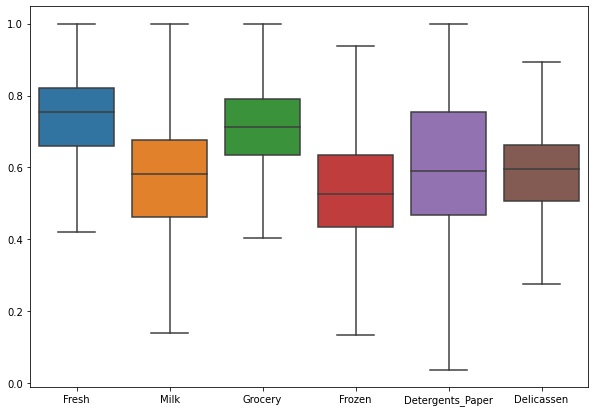

In [31]:

plt.figure(figsize=(10,7))
sns.boxplot(data=df_log_std[num_col])
plt.show()


## data for model

In [32]:
dummied_category=pd.get_dummies(data=df_cate[cate_col], columns= ['Region','Channel'])
df_cate.drop(cate_col+num_col, axis=1, inplace=True)
df_cate[dummied_category.columns]= dummied_category

In [33]:
data = df.copy()
data.drop(cate_col, axis=1, inplace=True)
data[num_col] = df_log_std
data[df_cate.columns] = df_cate

In [34]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3,Channel_1,Channel_2
0,0.792887,0.718009,0.757507,0.275354,0.713634,0.630253,0,0,1,0,1
1,0.737313,0.720208,0.780276,0.545723,0.735510,0.659511,0,0,1,0,1
2,0.727332,0.705239,0.759068,0.585620,0.742394,0.812973,0,0,1,0,1
3,0.797253,0.427833,0.701127,0.711219,0.538941,0.660206,0,0,1,1,0
4,0.847922,0.637521,0.752748,0.648109,0.670702,0.770203,0,0,1,0,1


## HOC

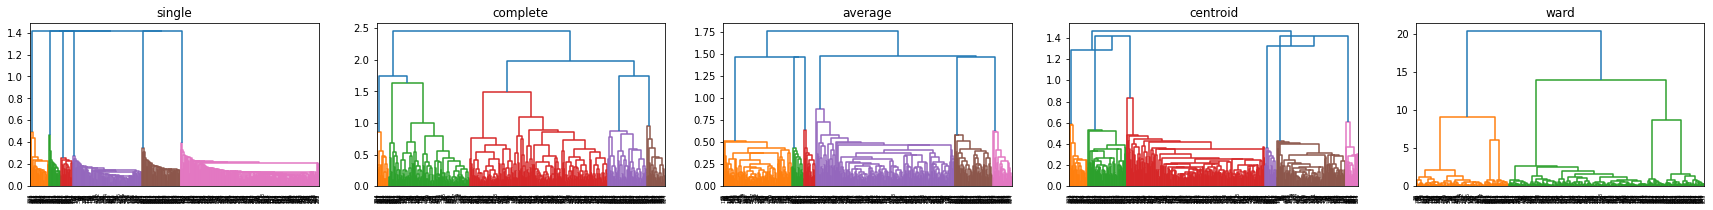

In [35]:
from scipy.cluster.hierarchy import linkage, dendrogram

linkage_list = ['single', 'complete', 'average', 'centroid', 'ward']

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(30, 3))

for i in range(len(linkage_list)):
    Z = linkage(data, method=linkage_list[i])
    den = dendrogram(Z, ax=axes[i])
    axes[i].title.set_text(linkage_list[i])
plt.show()


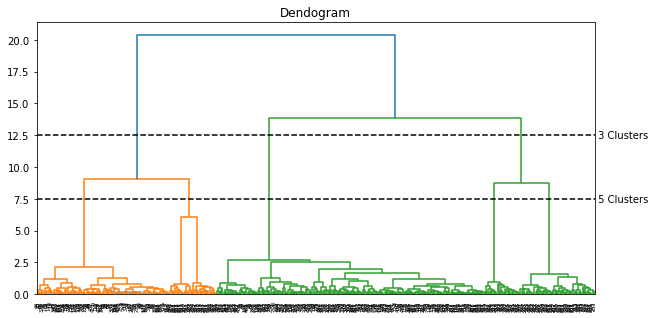

In [36]:
plt.figure(figsize=[10,5])
plt.title('Dendogram')
dendrogram(linkage(data, method="ward"))

# 클러스터를 구분하는 커트라인을 표시
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.5, 7.5], '--', c='k')
ax.plot(bounds, [12.5, 12.5], '--', c='k')
ax.text(bounds[1], 7.5, ' 5 Clusters ', va='center', fontdict={'size': 10})
ax.text(bounds[1], 12.5, ' 3 Clusters ', va='center', fontdict={'size': 10})
plt.show()

## AgglomerativeClustering

In [37]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(clustering, X_features, cluster_lists=[1]): 
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        if clustering[0] == 'hierarchical':
            model = AgglomerativeClustering(n_clusters=n_cluster, linkage=clustering[1])
        #elif clustering[0] == 'kmeans':
            #model = KMeans(n_clusters=n_cluster)
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        cluster_labels = model.fit_predict(X_features)
        
        #if clustering[0] == 'dbscan':
        #    n_cluster = len(set(cluster_labels))-1
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([-1, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")



In [38]:
params = {
    'linkage':['single', 'complete', 'average', 'ward'],
    'n_clusters':[2, 3, 4, 5, 6, 7, 8, 9, 10]}

scores_hierarcical= {}
for linkage in params['linkage']:
    for n_cluster in params['n_clusters']:
        hierarchical = AgglomerativeClustering(n_clusters=n_cluster, linkage=linkage)
        hierarchical.fit(data)
        score = silhouette_score(data, hierarchical.labels_)
        scores_hierarcical['_'.join(['original', linkage, str(n_cluster)])] = score
        
        


pd.Series(scores_hierarcical).sort_values(ascending=False)[:10]



original_complete_6    0.734146
original_average_6     0.734146
original_single_6      0.734146
original_ward_6        0.734146
original_single_7      0.714340
original_single_8      0.701872
original_ward_5        0.701496
original_average_5     0.701496
original_single_9      0.699125
original_complete_5    0.681244
dtype: float64

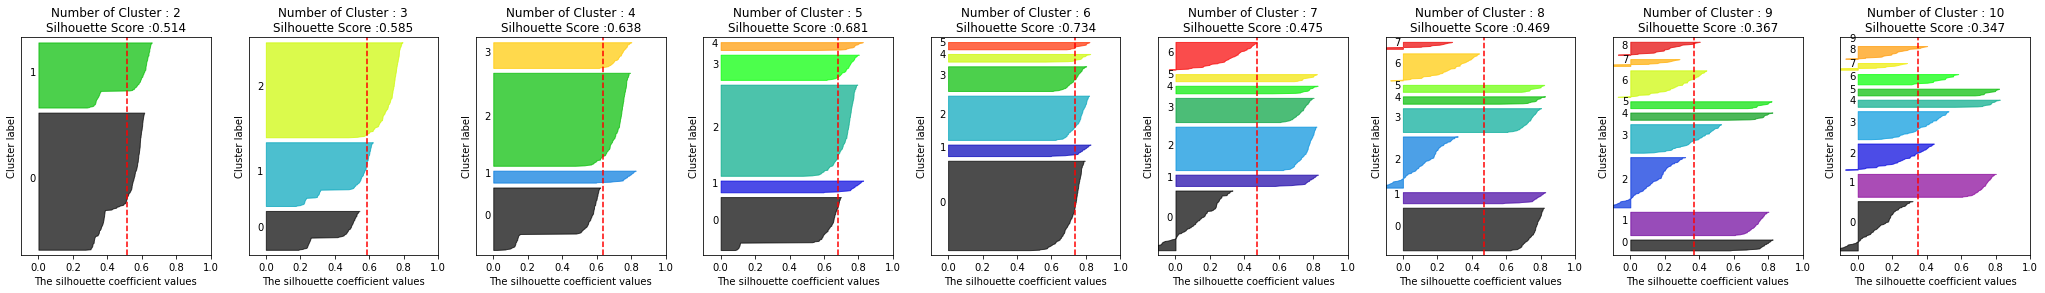

In [39]:
visualize_silhouette(['hierarchical', 'complete'], data, [2, 3, 4, 5, 6, 7, 8, 9, 10]) 

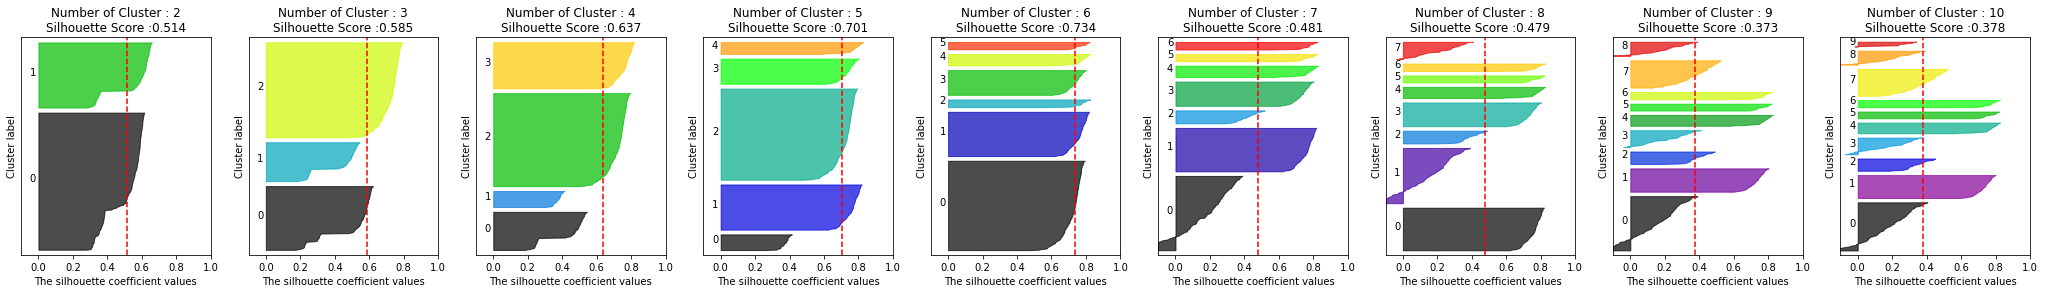

In [40]:
visualize_silhouette(['hierarchical', 'ward'], data, [2, 3, 4, 5, 6, 7, 8, 9, 10]) 

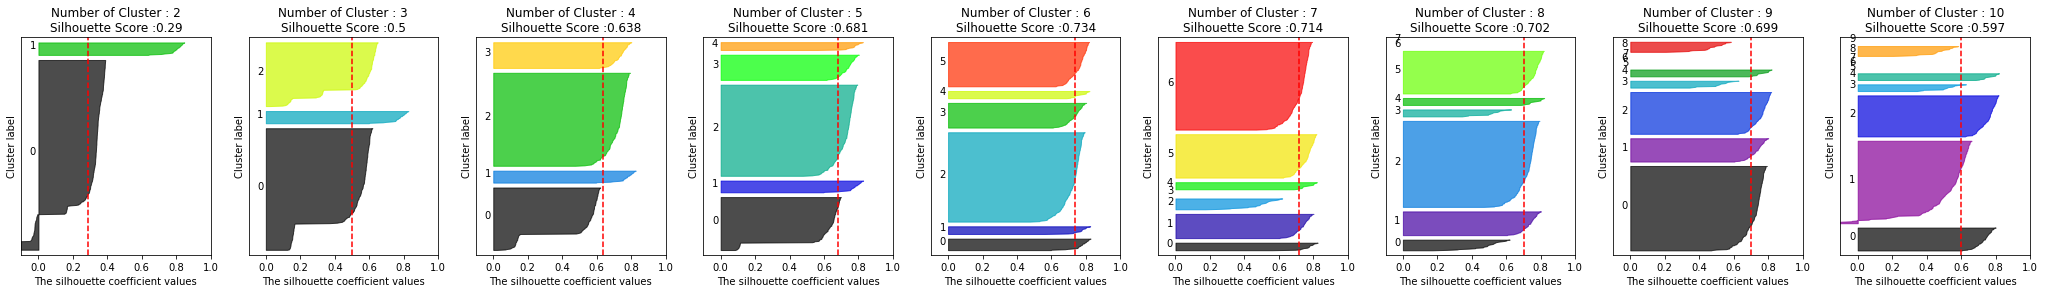

In [41]:
visualize_silhouette(['hierarchical', 'single'], data, [2, 3, 4, 5, 6, 7, 8, 9, 10]) 

## PCA

In [42]:
pca = PCA(n_components=2)
reduced_df = pca.fit_transform(data)
reduced_df.shape

(440, 2)

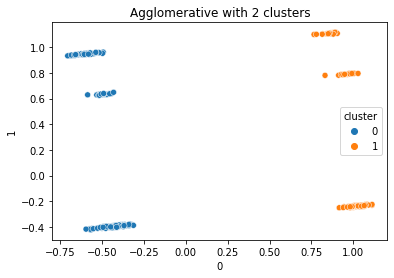

Agglomerative with 2 clusters
Silhouette Coefficient: 0.6796
Davies Bouldin Index: 0.6676


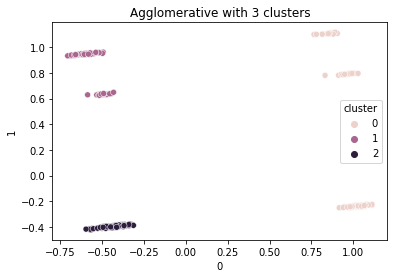

Agglomerative with 3 clusters
Silhouette Coefficient: 0.8415
Davies Bouldin Index: 0.3450


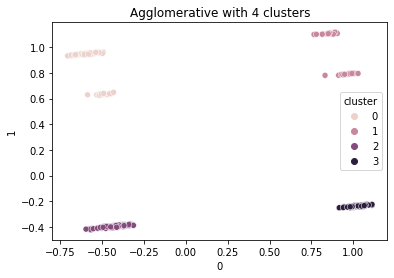

Agglomerative with 4 clusters
Silhouette Coefficient: 0.9284
Davies Bouldin Index: 0.1889


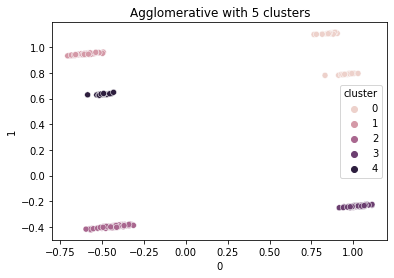

Agglomerative with 5 clusters
Silhouette Coefficient: 0.9244
Davies Bouldin Index: 0.1628


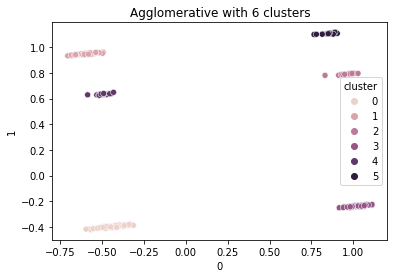

Agglomerative with 6 clusters
Silhouette Coefficient: 0.9264
Davies Bouldin Index: 0.1392


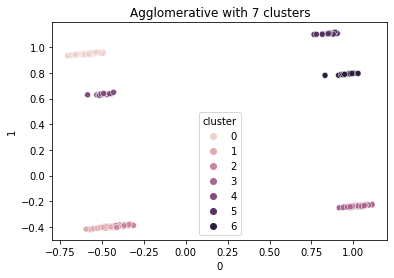

Agglomerative with 7 clusters
Silhouette Coefficient: 0.7398
Davies Bouldin Index: 0.2853


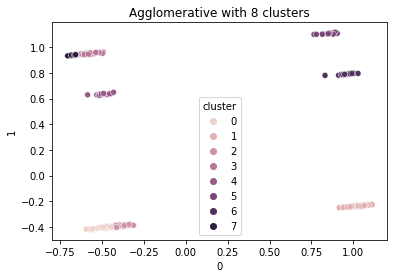

Agglomerative with 8 clusters
Silhouette Coefficient: 0.7026
Davies Bouldin Index: 0.3335


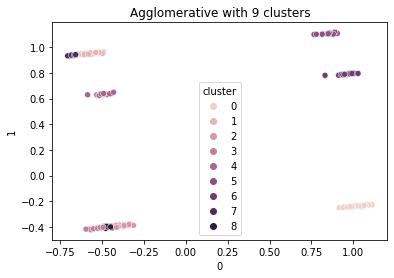

Agglomerative with 9 clusters
Silhouette Coefficient: 0.6965
Davies Bouldin Index: 0.3501


In [43]:
n = [2,3,4, 5,6, 7, 8, 9]
for i in n:
    agg = AgglomerativeClustering(n_clusters=i)
    cluster = agg.fit(reduced_df)
    cluster_id = pd.DataFrame(cluster.labels_)
    
    d4 = pd.DataFrame()
    d4 = pd.concat([ pd.DataFrame(reduced_df),cluster_id],axis=1)
    d4.columns = [0, 1, "cluster"]
    
    sns.scatterplot(d4[0], d4[1], hue = d4['cluster'], legend="full")
    plt.title('Agglomerative with {} clusters'.format(i))
    plt.show()
    print('Agglomerative with {} clusters'.format(i))
    print('Silhouette Coefficient: {:.4f}'.format(silhouette_score(d4.iloc[:,:-1], d4['cluster'])))
    print('Davies Bouldin Index: {:.4f}'.format(davies_bouldin_score(d4.iloc[:,:-1], d4['cluster'])))

## 군집별 상세 분석

In [50]:
agg = AgglomerativeClustering(n_clusters=5)
cluster = agg.fit(reduced_df)
cluster_id = pd.DataFrame(cluster.labels_)
cluster_id.columns = ["cluster"]

final = pd.DataFrame()
final = pd.concat([ data,cluster_id],axis=1)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3,Channel_1,Channel_2,cluster
0,0.792887,0.718009,0.757507,0.275354,0.713634,0.630253,0,0,1,0,1,3
1,0.737313,0.720208,0.780276,0.545723,0.735510,0.659511,0,0,1,0,1,3
2,0.727332,0.705239,0.759068,0.585620,0.742394,0.812973,0,0,1,0,1,3
4,0.847922,0.637521,0.752748,0.648109,0.670702,0.770203,0,0,1,0,1,3
5,0.764673,0.696297,0.719915,0.420952,0.671761,0.638630,0,0,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
418,0.512265,0.700195,0.844682,0.214357,0.810759,0.573970,0,0,1,0,1,3
421,0.821167,0.622254,0.774925,0.476994,0.739332,0.659975,0,0,1,0,1,3
423,0.823921,0.584211,0.710634,0.480430,0.672228,0.558486,0,0,1,0,1,3
424,0.820704,0.550122,0.804033,0.455807,0.732926,0.456532,0,0,1,0,1,3


In [107]:
final[final["cluster"]==0].loc[:,["Region_1","Region_2","Region_3","Channel_1","Channel_2"]].sum()

Region_1     18
Region_2     19
Region_3      0
Channel_1     0
Channel_2    37
dtype: int64

In [108]:
final[final["cluster"]==0].loc[:,["Fresh",	"Milk",	"Grocery",	"Frozen",	"Detergents_Paper"	,"Delicassen"]].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,0.673751,0.690511,0.817856,0.493474,0.798078,0.600281
std,0.115390,0.102346,0.064027,0.142715,0.096976,0.110427
min,0.419408,0.392585,0.659440,0.133563,0.494461,0.307767
25%,0.633361,0.634719,0.782445,0.444301,0.758819,0.563025
50%,0.683298,0.682978,0.816508,0.488525,0.802594,0.620290
75%,0.755707,0.761866,0.861602,0.551278,0.852930,0.678628
max,0.865041,0.867530,0.968944,0.786953,0.992743,0.791500


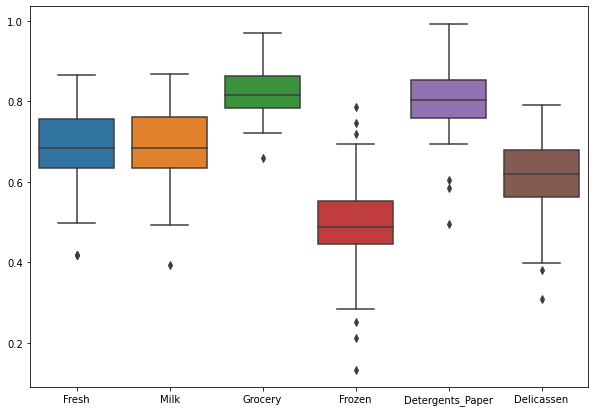

In [109]:
plt.figure(figsize=(10,7))
sns.boxplot(data=final[final["cluster"]==0].loc[:,["Fresh",	"Milk",	"Grocery",	"Frozen",	"Detergents_Paper"	,"Delicassen"]])
plt.show()

In [110]:
final[final["cluster"]==1].loc[:,["Region_1","Region_2","Region_3","Channel_1","Channel_2"]].sum()

Region_1     59
Region_2      0
Region_3      0
Channel_1    59
Channel_2     0
dtype: int64

In [111]:
final[final["cluster"]==1].loc[:,["Fresh",	"Milk",	"Grocery",	"Frozen",	"Detergents_Paper"	,"Delicassen"]].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,0.750573,0.520895,0.663742,0.558493,0.520989,0.568598
std,0.101244,0.144923,0.080949,0.132561,0.145163,0.112297
min,0.488519,0.214740,0.492656,0.165690,0.053667,0.275952
25%,0.693058,0.412404,0.608446,0.468625,0.459040,0.498560
50%,0.756710,0.517472,0.653365,0.552595,0.517142,0.570311
75%,0.826953,0.626446,0.720783,0.665292,0.596019,0.650007
max,0.934180,0.841739,0.835675,0.848721,0.795485,0.799034


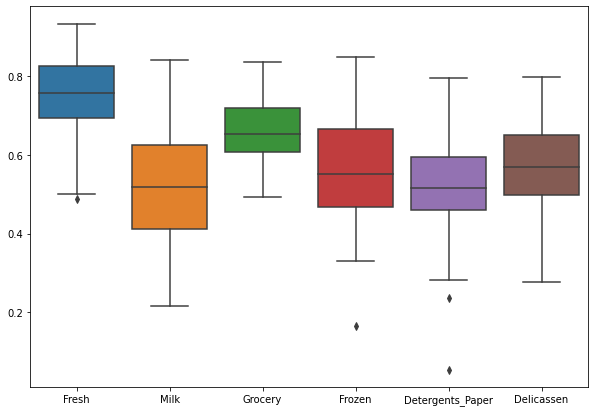

In [112]:
plt.figure(figsize=(10,7))
sns.boxplot(data=final[final["cluster"]==1].loc[:,["Fresh",	"Milk",	"Grocery",	"Frozen",	"Detergents_Paper"	,"Delicassen"]])
plt.show()

In [113]:
final[final["cluster"]==2].loc[:,["Region_1","Region_2","Region_3","Channel_1","Channel_2"]].sum()

Region_1       0
Region_2       0
Region_3     211
Channel_1    211
Channel_2      0
dtype: int64

In [114]:
final[final["cluster"]==2].loc[:,["Fresh",	"Milk",	"Grocery",	"Frozen",	"Detergents_Paper"	,"Delicassen"]].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,0.745317,0.514909,0.658976,0.545209,0.505665,0.567212
std,0.120985,0.130843,0.085178,0.167900,0.140838,0.123194
min,0.419408,0.140240,0.404004,0.133563,0.037835,0.275952
25%,0.675938,0.426956,0.611214,0.441050,0.428073,0.499796
50%,0.766660,0.515446,0.655811,0.559380,0.507256,0.580045
75%,0.830480,0.602511,0.716094,0.667171,0.604746,0.647551
max,1.000000,0.928560,0.856499,0.934534,0.813331,0.893714


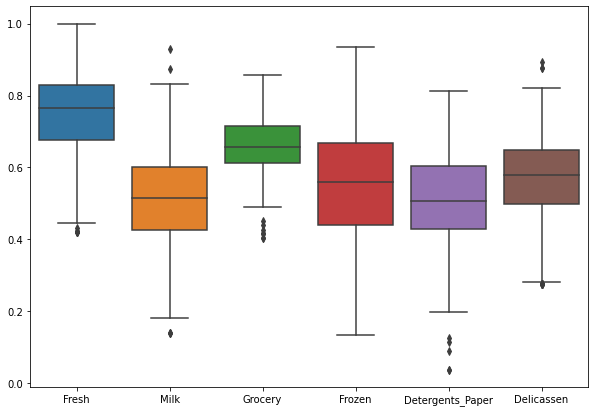

In [115]:
plt.figure(figsize=(10,7))
sns.boxplot(data=final[final["cluster"]==2].loc[:,["Fresh",	"Milk",	"Grocery",	"Frozen",	"Detergents_Paper"	,"Delicassen"]])
plt.show()

In [116]:
final[final["cluster"]==3].loc[:,["Region_1","Region_2","Region_3","Channel_1","Channel_2"]].sum()

Region_1       0
Region_2       0
Region_3     105
Channel_1      0
Channel_2    105
dtype: int64

In [117]:
final[final["cluster"]==3].loc[:,["Fresh",	"Milk",	"Grocery",	"Frozen",	"Detergents_Paper"	,"Delicassen"]].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,0.705537,0.699284,0.811765,0.458913,0.783159,0.603593
std,0.133137,0.095382,0.055718,0.148068,0.081781,0.126237
min,0.419408,0.419207,0.707811,0.133563,0.542205,0.275952
25%,0.632594,0.654835,0.776167,0.366915,0.743020,0.537461
50%,0.741332,0.689152,0.803151,0.480430,0.781899,0.633895
75%,0.809408,0.737547,0.850639,0.573844,0.824435,0.679638
max,0.912136,0.999127,1.000000,0.741854,1.000000,0.889943


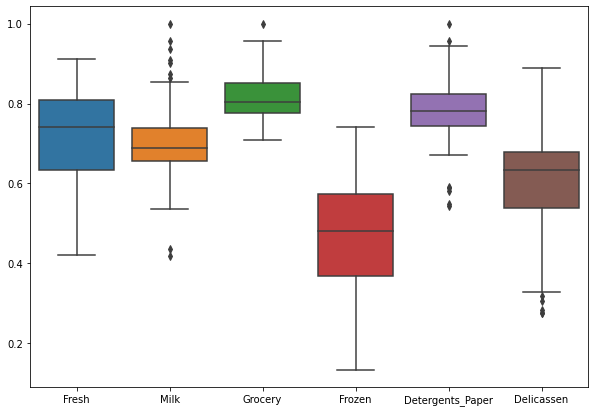

In [118]:
plt.figure(figsize=(10,7))
sns.boxplot(data=final[final["cluster"]==3].loc[:,["Fresh",	"Milk",	"Grocery",	"Frozen",	"Detergents_Paper"	,"Delicassen"]])
plt.show()

In [119]:
final[final["cluster"]==4].loc[:,["Region_1","Region_2","Region_3","Channel_1","Channel_2"]].sum()

Region_1      0
Region_2     28
Region_3      0
Channel_1    28
Channel_2     0
dtype: int64

In [120]:
final[final["cluster"]==4].loc[:,["Fresh",	"Milk",	"Grocery",	"Frozen",	"Detergents_Paper"	,"Delicassen"]].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,0.737014,0.475702,0.685922,0.587741,0.492300,0.573849
std,0.123142,0.097479,0.060754,0.153634,0.105357,0.097113
min,0.419408,0.250193,0.589429,0.302282,0.169085,0.292713
25%,0.703218,0.421605,0.645431,0.468091,0.431739,0.541579
50%,0.768374,0.464723,0.678826,0.600289,0.491885,0.587300
75%,0.820986,0.521359,0.727035,0.669011,0.573874,0.614154
max,0.882994,0.794818,0.814471,0.936999,0.664742,0.778324


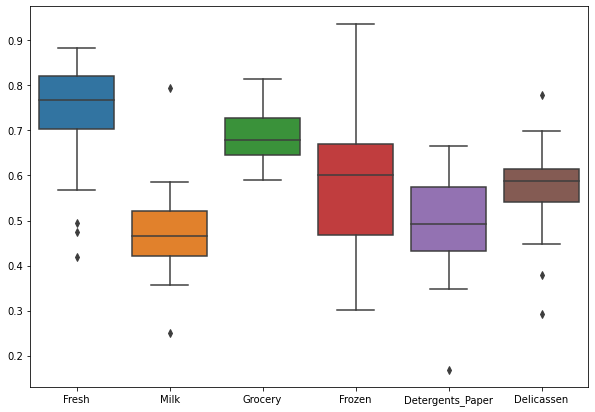

In [121]:
plt.figure(figsize=(10,7))
sns.boxplot(data=final[final["cluster"]==4].loc[:,["Fresh",	"Milk",	"Grocery",	"Frozen",	"Detergents_Paper"	,"Delicassen"]])
plt.show()